<a href="https://colab.research.google.com/github/preston-cell/vhs-intro-ai/blob/main/Titanic_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, you will explore the famous Titanic dataset to understand how data can provide insights into the survival of passengers. You will use the Pandas library in Python to analyze and visualize the data.

*Note: Points for each section are given in [].*


In [24]:
# Import libraries [6]

# numpy
# pandas
# matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Get Data
Upload `train.csv` to a Google folder named `vhs-ai-intro`. Load this file into a dataframe named `df`. [6]





In [1]:
# mount google drive

# access file and load into data frame

from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df=pd.read_csv('gdrive/My Drive/train.csv')

Mounted at /content/gdrive


# Explore Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Look at the output of `df.info()` above and answer the following: [8]

1. How many rows and columns does `df` have?
**891 rows, 12 columns**
2. Identify the columns that have integer datatype.
**PassengerId, Survived, Pclass, SibSp, Parch**
3. Identify the columns containing `null` (empty) values and calculate the proportion of values that are `null`.
**Age column: 177 null values. About 20% are null.
Cabin column: 687 null values. About 77% are null.
Embarked column: 2 null values. About .2% are null.**






# Data Cleaning

In [4]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Explain what the above line of code is doing. You can use `df.info()` to check the changes in `df`. [2]

**The line of code is dropping, or deleting, the "passengerId," "name," and "ticket" columns from df.**

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)

Using the `fillna()` function, we can fill the missing values in the `Age` column with the median value of `Age`.

What does the `inplace` parameter specify in the `fillna()` function? [2]
**The inplace parameter, when set to true, will edit the dataframe itself instead of creating new objects after each run**

# Data Analysis

Let's do some counting. Using `groupby` and `size()`, or otherwise:

1. Count the number of male and female passengers. (*Hint: Use `Sex` column*) [2]
**314 female, 577 male.**
2. What percentage of passengers survived? (*Hint: Use `Survived` column*) [2]
**About 38% survived**


In [12]:
# Number of male & female passengers
print(df.groupby('Sex').size())

Sex
female    314
male      577
dtype: int64


In [21]:
# Percentage of passengers that survived
totalpassengers = len(df)
survived = df['Survived'].sum()
survival_rate = (survived / totalpassengers) * 100

print(f"{survival_rate}% of passengers survived")

38.38383838383838% of passengers survived


We want to see if gender played a role in the survival rates. Let us visualise the survival rates. We will combine the 2 columns `Survived` and `Sex` to answer this and use `Matplotlib` to plot the counts.

2


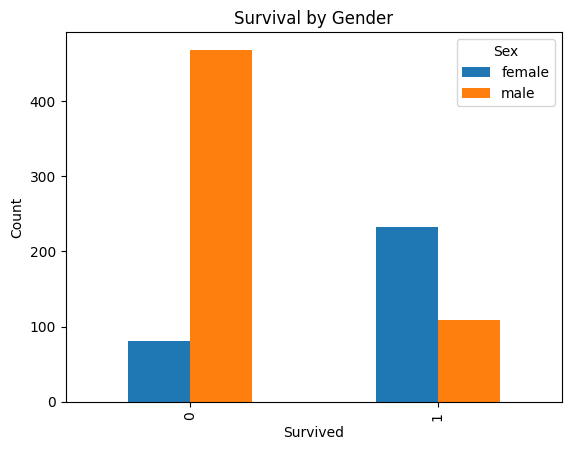

In [37]:
# Group the data by 'Survived' and 'Sex' and get the counts
survival_gender_counts = df.groupby(['Survived', 'Sex']).size().unstack()
print(len(survival_gender_counts.axes[0]))

# Plot the grouped data
survival_gender_counts.plot(kind='bar')

# Add title and labels
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')

# Show the plot
plt.show()

Let us pay attention to the code.


1.   `survival_gender_counts` holds the counts of number of survivors that are male and female. What is the type of this variable? How many rows and columns does this variable have? [2]
**survival_gender_counts is a dataframe type. It has 2 rows and 2 columns**

2.   In the `survival_gender_counts.plot(kind='bar')` line, what does the `kind='bar'` parameter specify? How would the plot change if you used `kind='barh'` instead? [4]

**If you used kind='barh', a horizontal bar chart would be created instead of a vertical one**

We can create the same plot with another library `Seaborn` that is built on top of `Matplotlib`.

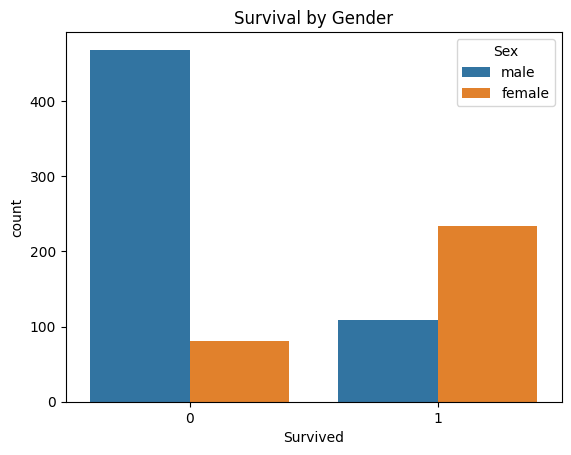

In [38]:
import seaborn as sns
sns.countplot(x='Survived', hue='Sex', data=df)

plt.title('Survival by Gender')
plt.show()

We used the function `countplot()` in `seaborn` to generate the bar plot showing the counts we need.

Explain what each of the parameters for `countplot()` specify. [6]

**The first parameter is what the X axis is; the second is the data to be graphed, with the different values indicated by the different color; the final parameter is the dataframe that the plot is pulling from.**

By looking at the plot, do you think gender and survival were related? Explain why or why not.    [3]

**Yes, it seems that the passengers that died were predominantly males, while the passengers that survived were predominantly female. It is reasonable to suggest that a female had a higher chance of surviving.**

In the Titanic dataset, `Pclass` refers to the passenger class, which indicates the socioeconomic status (SES) of the passengers. There are three classes:

* 1 = First class (Upper class)
* 2 = Second class (Middle class)
* 3 = Third class (Lower class)

Using `seaborn` library, create a count plot (similar to the one above) to show the relationship between survivors and passenger class.

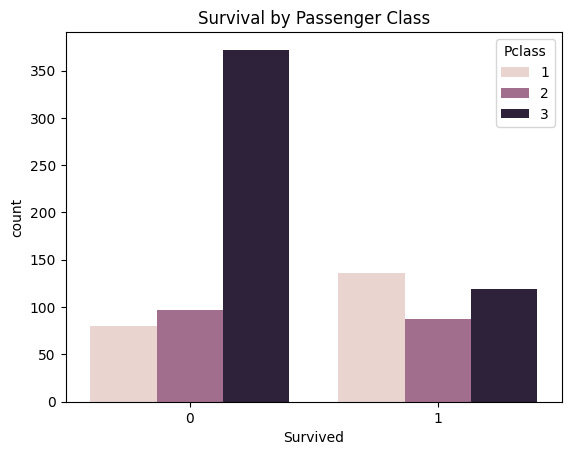

In [39]:
# Plot Survival by Passenger Class [6]
import seaborn as sns

sns.countplot(x='Survived', hue='Pclass', data=df)

plt.title('Survival by Passenger Class')

plt.show()

By looking at the plot, do you think passenger class and survival were related? Explain why or why not. [3]

**It seems that the passengers that died were predominantly in the lower class, while those who survived were predominatnly in the upper class. There were more survivors in the lower class than in the middle class, but this may just be attributed to the large amount of lower class passengers. Proportionally, the higher the class, the more survivors there were compared to non-survivors. Therefore it is safe to assume that a higher class mean't a higher chance of survival.**